In [1]:
# This notebook's owner is a github user with the name yuki678. I merely modified a few scripts to make it compatible so it can be run uninterrupted and smoothly.
# Many of the scripts used to run this notebook are copyrighted by the Tensorflow authors and licensed under the Apache License, Version 2.0 (the "License").
# A copy of the license can be obtained at 
# http://www.apache.org/licenses/LICENSE-2.0

In [2]:
# Read the README document first before running this notebook. It specifies what changes to make so all cells can be run be at once.
# Make all the specified changes in the README before running any cells, then run until cell 12, make the specified changes and save them.
# Before running the notebook the second time, make sure to comment out the line !rm -rf {repo_dir_path} in cell 11.
# After these changes are made then you can run the entire notebook through the terminal command: 
# nohup jupyter nbconvert --to notebook --execute (notebookname).ipynb > (notebookname)_stdout.txt 2> (notebookname)_stderr.txt &
# For this specific notebook the command would be :
# nohup jupyter nbconvert --to notebook --execute TF_exec.ipynb > TF_exec_stdout.txt 2> TF_exec_stderr.txt &
#This notebook is used for transfer learning. The pretrained models that can be selected are already trained on the coco dataset.
# The data is already pre-labeled. Since this is transfer learning 100 "samples" per label is sufficient.
# If you want to use your own data then you can use LabelImg to label the images and store the bounding box coordinates. The xml files 
# created by LabelImg are in Pascal VOC format. Go to driving-object-detection/images, delete the imported images and xml files and upload your own.
# Also go to driving-object-detection/annotations and change the label_map.pbtxt file to match the structure of your object detection dataset.
# In that text file create as many items as you need and assign them the corresponding name.
 



In [3]:
cd ./

/home/faizan_samad/testing/Object-detection


In [4]:
# %tensorflow_version
# First install the required packages
# These are linux commands so change the terminal commands based on your OS. 

!pip install -q pillow lxml jupyter matplotlib cython pandas contextlib2
!sudo apt-get install -qq protobuf-compiler
!pip install -q pycocotools tf_slim

In [5]:
# Ensure that you are in the correct directory first before cloning the driving object detection github repository
# This cell creates the repository directory that already has the code for the models and the pipeline configuration files
# Also additional subdirectories and file paths are created, they will be of use later.
# The original repo_url is repo_url = 'https://github.com/yuki678/driving-object-detection'
# However I already cloned that repoistory into my own, although this is not necessary.

%cd ./
import os

# Repo URL
repo_url = 'https://github.com/Thearkhamknight/driving-object-detection'
# repo_url = 'https://github.com/yuki678/driving-object-detection'
# Models
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_320x320_coco17_tpu-8',
        'model_path': '/models/tf2/my_ssd_mobilenet_v2/',
        'pipeline_file': 'pipeline.config'
    },
    'ssd_mobilenet_v2_fpn': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'model_path': '/models/tf2/my_ssd_mobilenet_v2_fpnlite/',
        'pipeline_file': 'pipeline.config'
    },
    'my_centernet_resnet50_v1_fpn': {
        'model_name': 'centernet_resnet50_v1_fpn_512x512_coco17_tpu-8',
        'model_path': '/models/tf2/my_centernet_resnet50_v1_fpn/',
        'pipeline_file': 'pipeline.config'
    },
    'my_centernet_resnet101_v1_fpn': {
        'model_name': 'centernet_resnet101_v1_fpn_512x512_coco17_tpu-8',
        'model_path': '/models/tf2/my_centernet_resnet101_v1_fpn/',
        'pipeline_file': 'pipeline.config'
    }
}

# Select a model to use.
selected_model = 'my_centernet_resnet50_v1_fpn'

model_name = MODELS_CONFIG[selected_model]['model_name']
model_path = MODELS_CONFIG[selected_model]['model_path']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Set Repository Home Directory
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

# Set Label Map (.pbtxt) path and pipeline.config path
label_map_pbtxt_fname = repo_dir_path + '/annotations/label_map.pbtxt'
pipeline_fname = repo_dir_path + model_path + pipeline_file
# pipeline_fname ='/home/faizan_samad/testing/Ex_Scripts/pipeline.config'
# Set .record path
test_record_fname = repo_dir_path + '/annotations/test.record'
train_record_fname = repo_dir_path + '/annotations/train.record'

# Set output directories and clean up
model_dir = repo_dir_path + '/training/'
output_dir = repo_dir_path + '/exported-models/'

!rm -rf {model_dir} {output_dir}
os.makedirs(model_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

/home/faizan_samad/testing/Object-detection


In [6]:
print(repo_dir_path,model_name,model_path)

/home/faizan_samad/testing/Object-detection/driving-object-detection centernet_resnet50_v1_fpn_512x512_coco17_tpu-8 /models/tf2/my_centernet_resnet50_v1_fpn/


In [7]:
# Clone Tensorflow model repo
%cd ./

# %cd /content
!git clone --quiet https://github.com/tensorflow/models.git

/home/faizan_samad/testing/Object-detection


In [8]:

# Compile protocol buffers
%cd ./models/research
!protoc object_detection/protos/*.proto --python_out=.

/home/faizan_samad/testing/Object-detection/models/research


In [9]:
# Set environment variables
import os
os.environ['PATH'] += ':/testing/models:/testing/models/research/:/testing/models/research/slim/'

In [10]:
# Install libraries
# Do not worry if this does not work. It is not necessary to run the rest of the cells.
!pip install .
# Test
!python object_detection/builders/model_builder_test.py

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
Traceback (most recent call last):
  File "object_detection/builders/model_builder_test.py", line 20, in <module>
    from object_detection.builders import model_builder
ModuleNotFoundError: No module named 'object_detection'


In [11]:
%cd -

/home/faizan_samad/testing/Object-detection


In [12]:
# Coco Installation (Optional, required when using Coco Evaluation)

%cd ./
!git clone --quiet https://github.com/cocodataset/cocoapi.git


/home/faizan_samad/testing/Object-detection


In [13]:
%cd cocoapi/PythonAPI
!make
!cp -r pycocotools %cd ./models/research/

/home/faizan_samad/testing/Object-detection/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/faizan_samad/testing/Object-detection/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -

In [14]:
%cd -

/home/faizan_samad/testing/Object-detection


In [15]:
# If the model that was selected for some reason does not exist, this cell will download it from the tensorflow repository.
# It also sets the file path for the checkpoints, which needs to be established before the model can be trained.
# The DEST_DIR is the path where the pretrained model is so under models/research/pretrained_model

%cd ./models/research
import sys 
import os
import shutil
import glob
import urllib.request
import tarfile
a = sys.path[0]
MODEL_FILE = model_name + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'
DEST_DIR = 'models/research/pretrained_model'
b = os.path.join(a, DEST_DIR)
print('model name and dest_dir are ' ,model_name, DEST_DIR)
if not (os.path.exists(MODEL_FILE)):
    print('in first if')
    print('downloading ', DOWNLOAD_BASE + MODEL_FILE)
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()


print(MODEL_FILE)
os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    print('in second if')
    shutil.rmtree(DEST_DIR)
os.rename(model_name, b)

# Check downloaded files
!echo {b}
!ls -alh {b}

# Set fine tune checkpoint
fine_tune_checkpoint = os.path.join(DEST_DIR, "checkpoint/ckpt-0")
print("fine_tune_checkpoint: ", fine_tune_checkpoint)

/home/faizan_samad/testing/Object-detection/models/research
model name and dest_dir are  centernet_resnet50_v1_fpn_512x512_coco17_tpu-8 models/research/pretrained_model
in first if
downloading  http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz
centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz
/home/faizan_samad/testing/Object-detection/models/research/pretrained_model
total 20K
drwxr-x---  4 faizan_samad faizan_samad 4.0K Jul 11  2020 .
drwxr-xr-x 23 faizan_samad faizan_samad 4.0K Apr  2 00:38 ..
drwxr-x---  2 faizan_samad faizan_samad 4.0K Jul 10  2020 checkpoint
-rw-r-----  1 faizan_samad faizan_samad 2.8K Jul 11  2020 pipeline.config
drwxr-x---  3 faizan_samad faizan_samad 4.0K Jul 10  2020 saved_model
fine_tune_checkpoint:  models/research/pretrained_model/checkpoint/ckpt-0


In [16]:
%cd -

/home/faizan_samad/testing/Object-detection


In [17]:
%cd ./

/home/faizan_samad/testing/Object-detection


In [18]:
# This cell clones all the content from the original driving object detection repository into the repository directory path.
# It also checks that the label map and pipeline files exist.
# I added the line: os.makedirs(model_dir, exist_ok=True). after cloning  and pulling the repositories. 
# This ensures that a training sub folder will be created.
# The original clone command is !git clone {repo_url}
# Since the repository is public you will not be prompted to give your github username and password.
# But if you are prompted here is what you should do.

# Instead of !git clone {repo_url} type the command:
# !git clone https://<Username>:<Password>@github.com/yuki678/driving-object-detection.git
# Change the directory to fit your workspace.
import os
%cd ./
# Clean up

!rm -rf {repo_dir_path}

# Clone

!git clone https://github.com/Thearkhamknight/driving-object-detection.git
!git clone https://github.com/Thearkhamknight/Ex_Scripts.git
# !git clone {repo_url} 
# Pull (just in case the repo already exists)
%cd {repo_dir_path}
!git pull

# Check if label map and pipeline files exist
assert os.path.isfile(label_map_pbtxt_fname), '`{}` not exist'.format(label_map_pbtxt_fname)
assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)
os.makedirs(model_dir, exist_ok=True)

/home/faizan_samad/testing/Object-detection
Cloning into 'driving-object-detection'...
remote: Enumerating objects: 1355, done.
remote: Counting objects: 100% (1355/1355), done.
remote: Compressing objects: 100% (936/936), done.
remote: Total 1355 (delta 351), reused 1351 (delta 350), pack-reused 0
Receiving objects: 100% (1355/1355), 219.54 MiB | 53.88 MiB/s, done.
Resolving deltas: 100% (351/351), done.
Checking out files: 100% (1176/1176), done.
Cloning into 'Ex_Scripts'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.
/home/faizan_samad/testing/Object-detection/driving-object-detection
Already up to date.


In [19]:
# Check pipeline config - update if required
# Make sure that the pipeline is configured as needed. This cell checks that. If not you can manually go into the pipeline file and change it.
# The fine tune checkpoint type should be "detection"
# Ensure that the specified paths are completely correct with no typos.
# This pipeline configuration file is the only document where you will need to specify absolute file paths.
# The ReadMe Document in driving-object-detection mentions this as well. 


print(pipeline_fname)
!cat {pipeline_fname}


/home/faizan_samad/testing/Object-detection/driving-object-detection/models/tf2/my_centernet_resnet50_v1_fpn/pipeline.config
# CenterNet meta-architecture from the "Objects as Points" [1] paper
# with the ResNet-v2-101 backbone. The ResNet backbone has a few differences
# as compared to the one mentioned in the paper, hence the performance is
# slightly worse. This config is TPU comptatible.
# [1]: https://arxiv.org/abs/1904.07850
#

model {
  center_net {
    num_classes: 3
    feature_extractor {
      type: "resnet_v1_50_fpn"
    }
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 512
        max_dimension: 512
        pad_to_max_dimension: true
      }
    }
    object_detection_task {
      task_loss_weight: 1.0
      offset_loss_weight: 1.0
      scale_loss_weight: 0.1
      localization_loss {
        l1_localization_loss {
        }
      }
    }
    object_center_params {
      object_center_loss_weight: 1.0
      min_box_overlap_iou: 0.7
      max_b

In [20]:
%cd {repo_dir_path}
# This cell partitions the images into a train and test set.
# The xml files were manually created using the LabelImg software.

# Split images to train:test = 9:1
!python scripts/partition_dataset.py -x -i images/ -r 0.1

# Check test images
!ls images/test

/home/faizan_samad/testing/Object-detection/driving-object-detection
 green_1.jpg			      red_352.xml   red_706.png
 green_1.xml			      red_387.jpg   red_706.xml
 green_141.png			      red_387.xml   red_804.png
 green_141.xml			      red_398.png   red_804.xml
 green_266.png			      red_398.xml   red_823.png
 green_266.xml			      red_517.jpg   red_823.xml
'image_2020-09-01 12:52:20.504.jpg'   red_517.xml   yellow_832.jpg
'image_2020-09-01 12:52:20.504.xml'   red_550.png   yellow_832.xml
 red_351.jpg			      red_550.xml   yellow_932.png
 red_351.xml			      red_604.png   yellow_932.xml
 red_352.png			      red_604.xml


In [21]:
# This cell creates the train and test data from the xml files and converts it into a train and test csv file respectively.
# Create train data:
!python scripts/xml_to_csv.py -i images/train -o annotations/train_labels.csv

# Create test data:
!python scripts/xml_to_csv.py -i images/test -o annotations/test_labels.csv

Successfully converted xml to csv.
Successfully converted xml to csv.


In [22]:
%cd -

/home/faizan_samad/testing/Object-detection


In [23]:
# This cell converts the train labeled csv into a tf.record format for training. Make sure the parameters are specified correctly.


!python Ex_Scripts/generate_tfrecord_v1.py --csv_input=driving-object-detection/annotations/train_labels.csv --output_path=driving-object-detection/annotations/train.record --img_path=driving-object-detection/images/train --label_map driving-object-detection/annotations/label_map.pbtxt
!python Ex_Scripts/generate_tfrecord_v1.py --csv_input=driving-object-detection/annotations/test_labels.csv --output_path=driving-object-detection/annotations/test.record --img_path=driving-object-detection/images/test --label_map driving-object-detection/annotations/label_map.pbtxt
assert os.path.isfile(test_record_fname), '`{}` not exist'.format(test_record_fname)
assert os.path.isfile(train_record_fname), '`{}` not exist'.format(train_record_fname)

2022-04-02 00:39:47.495746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 00:39:47.495792: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/faizan_samad/testing/Object-detection/models/research
2022-04-02 00:39:52.030886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-02 00:39:52.030951: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 00:39:52.030983: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (production-instance-static-ip): /proc/driver/nvidia/version do

In [24]:
# Set log directory for tensorboard to watch
LOG_DIR = model_dir

# Clean up the directory
!rm -rf {LOG_DIR}/*

In [25]:
# Use magic command to launch tensorboard within the notebook
%load_ext tensorboard
%tensorboard --logdir {LOG_DIR}

In [26]:
# Make sure to have the latest project repo downloaded
%cd {repo_dir_path}
!git pull

/home/faizan_samad/testing/Object-detection/driving-object-detection
Already up to date.


In [27]:
%cd -

/home/faizan_samad/testing/Object-detection


In [28]:
#TRAINING 
# This cell trains the model. 

!python Ex_Scripts/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr

/home/faizan_samad/testing/Object-detection/models/research
2022-04-02 00:40:01.297480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 00:40:01.297525: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-02 00:40:07.593559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:
2022-04-02 00:40:07.593609: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 00:40:07.593632: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on

In [29]:
# Check the generated files
# The line underneath !ls -lrt {model_dir} is unnecessary and can be commented out.
!ls -lrt {model_dir}
#content_test/models/research/object_detection/model_main_tf2.py

total 98956
drwxr-xr-x 2 faizan_samad faizan_samad      4096 Apr  2 00:40 train
-rw-r--r-- 1 faizan_samad faizan_samad 101296932 Apr  2 00:40 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 faizan_samad faizan_samad     23567 Apr  2 00:40 ckpt-1.index
-rw-r--r-- 1 faizan_samad faizan_samad       166 Apr  2 00:40 checkpoint


In [30]:
%cd ./

/home/faizan_samad/testing/Object-detection


In [31]:
# This cell evaluates the models performance on the test set
# Change the directory to fit your workspace.


!python Ex_Scripts/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --checkpoint_dir={model_dir} \
    --eval_timeout=60

/home/faizan_samad/testing/Object-detection/models/research
2022-04-02 00:41:05.851023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 00:41:05.851067: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-02 00:41:09.457236: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:
2022-04-02 00:41:09.457290: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 00:41:09.457314: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on

In [32]:
# Check the generated files
!ls -lrt {model_dir}

total 98960
drwxr-xr-x 2 faizan_samad faizan_samad      4096 Apr  2 00:40 train
-rw-r--r-- 1 faizan_samad faizan_samad 101296932 Apr  2 00:40 ckpt-1.data-00000-of-00001
-rw-r--r-- 1 faizan_samad faizan_samad     23567 Apr  2 00:40 ckpt-1.index
-rw-r--r-- 1 faizan_samad faizan_samad       166 Apr  2 00:40 checkpoint
drwxr-xr-x 2 faizan_samad faizan_samad      4096 Apr  2 00:41 eval


In [33]:
%cd ./

/home/faizan_samad/testing/Object-detection


In [34]:
#This cell exports the  trained model to the exported-models folder


!python Ex_Scripts/exporter_main_v2.py \
    --input_type image_tensor \
    --pipeline_config_path {pipeline_fname} \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_dir}

/home/faizan_samad/testing/Object-detection/models/research
2022-04-02 00:41:55.749212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 00:41:55.749264: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-02 00:41:59.116097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-02 00:41:59.116154: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 00:41:59.116179: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (production-instance-static-ip): /proc/driver/nvidia/version do

In [35]:
# Check the output files
!echo {output_dir}
!ls -lsr {output_dir}

/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/
total 16
4 drwxr-xr-x 4 faizan_samad faizan_samad 4096 Apr  2 00:42 saved_model
4 -rw-r--r-- 1 faizan_samad faizan_samad 2724 Apr  2 00:42 pipeline.config
4 drwxr-xr-x 2 faizan_samad faizan_samad 4096 Apr  2 00:39 exporter
4 drwxr-xr-x 2 faizan_samad faizan_samad 4096 Apr  2 00:42 checkpoint


In [36]:
%cd {repo_dir_path}
!tar zcvf trained_model.tar.gz {output_dir}

/home/faizan_samad/testing/Object-detection/driving-object-detection
tar: Removing leading `/' from member names
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/saved_model/
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/saved_model/saved_model.pb
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/saved_model/assets/
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/saved_model/variables/
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/saved_model/variables/variables.index
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/saved_model/variables/variables.data-00000-of-00001
/home/faizan_samad/testing/Object-detection/driving-object-detection/exported-models/pipeline.config
/home/faizan_sama

In [37]:
import os

# Use images in test dir (update this if you have other images for inference)
IMAGE_DIR = os.path.join(repo_dir_path, "images", "test")
IMAGE_PATHS = []

for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_PATHS

['/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_550.png',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/image_2020-09-01 12:52:20.504.jpg',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/green_141.png',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_823.png',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/yellow_932.png',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/yellow_832.jpg',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_351.jpg',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_604.png',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_398.png',
 '/home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_706.png',


In [38]:
%cd -

/home/faizan_samad/testing/Object-detection


In [39]:
# Make sure you append the object_detection folder to the system file path


import sys

sys.path.insert(1,os.path.join(sys.path[0],'models','research'))
import time
import tensorflow as tf # Added as colab instance often crash
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

# Label Map path
PATH_TO_LABELS = label_map_pbtxt_fname
# Saved model path
PATH_TO_SAVED_MODEL = os.path.join(output_dir, "saved_model")

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# Set category index
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

2022-04-02 00:42:58.663214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 00:42:58.663255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading model...

2022-04-02 00:43:02.562042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-02 00:43:02.562133: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 00:43:02.562171: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (production-instance-static-ip): /proc/driver/nvidia/version does not exist
2022-04-02 00:43:02.562482: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done! Took 13.814793348312378 seconds


Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_550.png... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/image_2020-09-01 12:52:20.504.jpg... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/green_141.png... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_823.png... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/yellow_932.png... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/yellow_832.jpg... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_351.jpg... Done
Running inference for /home/faizan_samad/testing/Object-detection/driving-object-detection/images/test/red_60

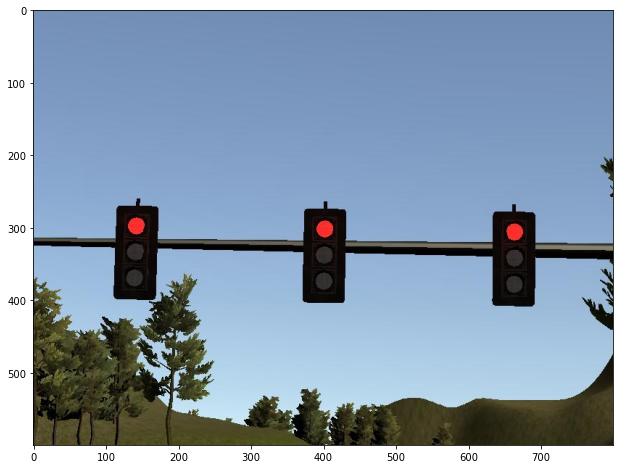

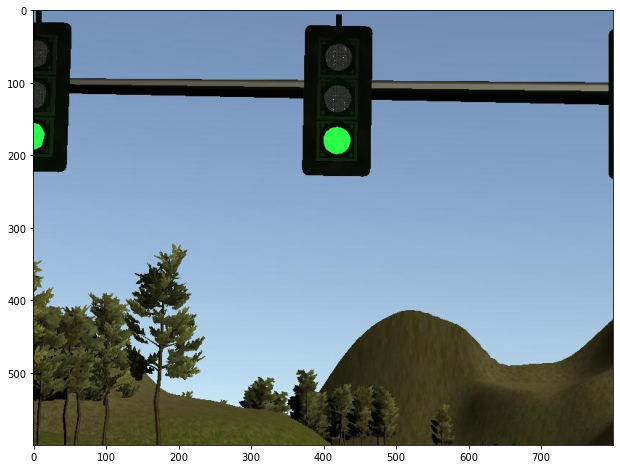

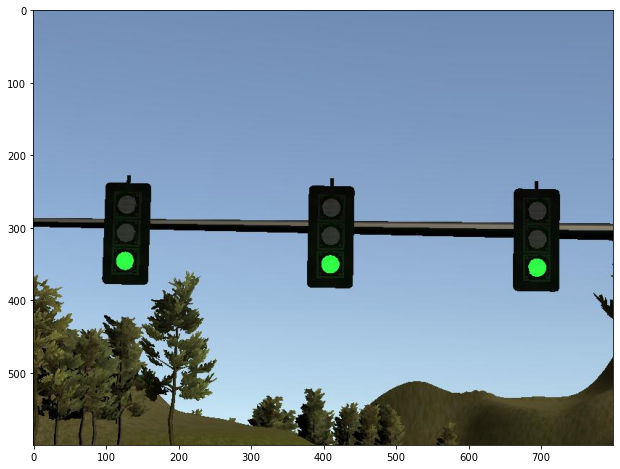

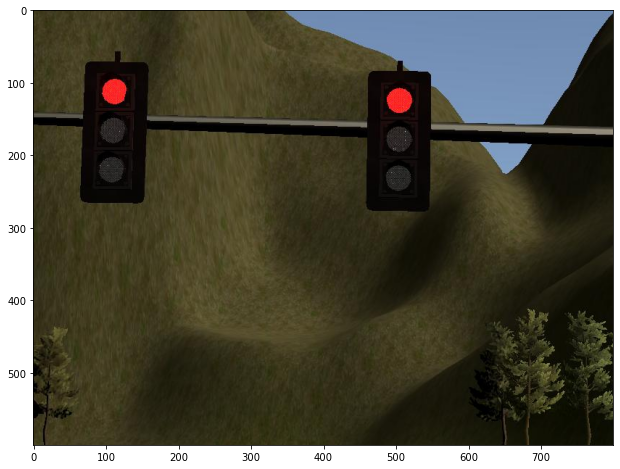

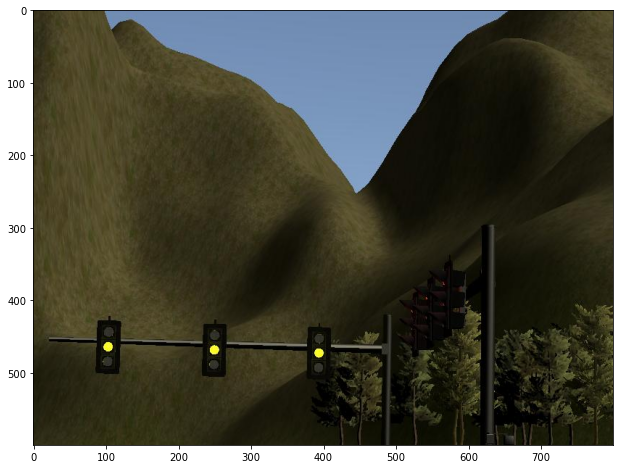

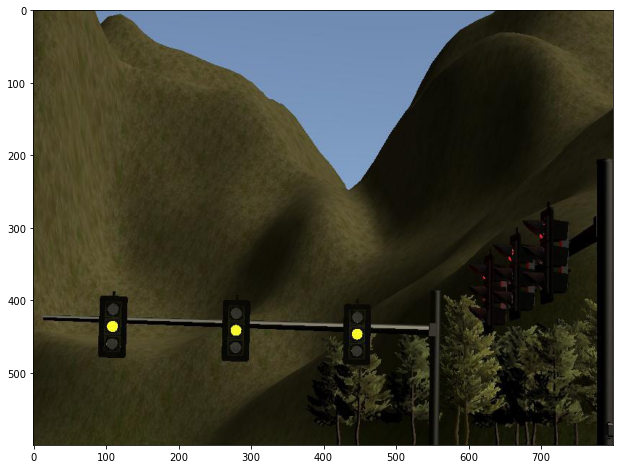

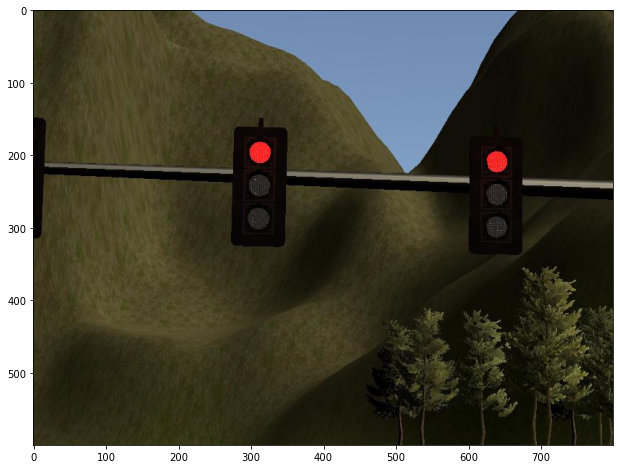

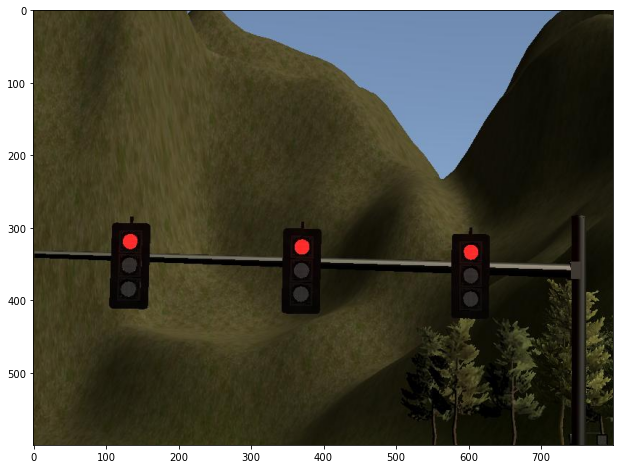

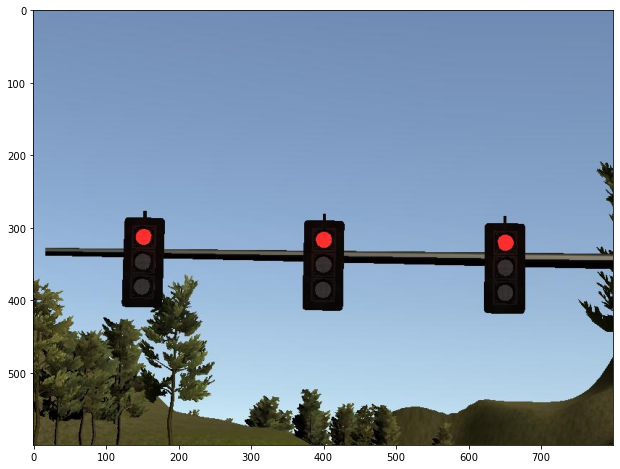

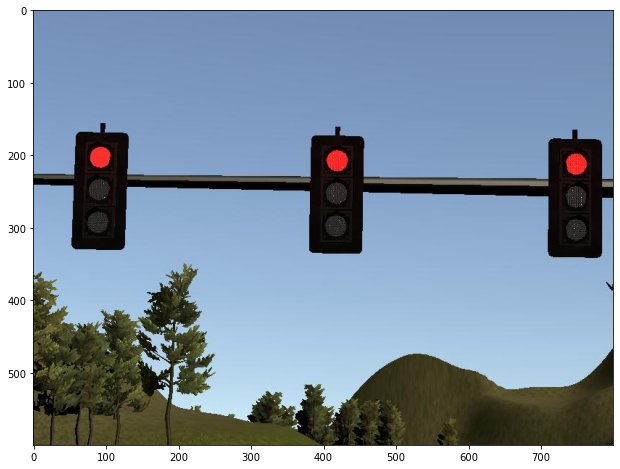

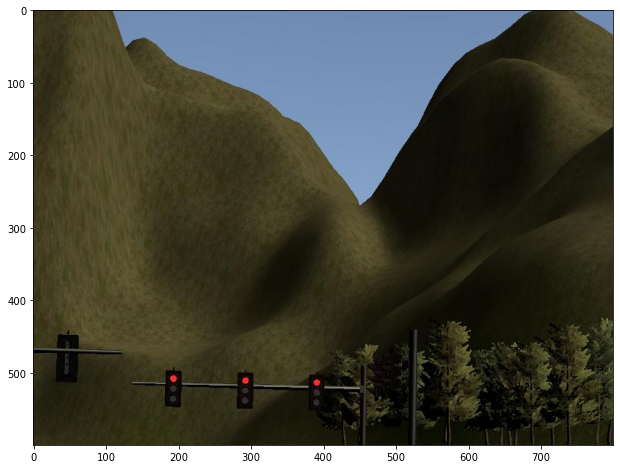

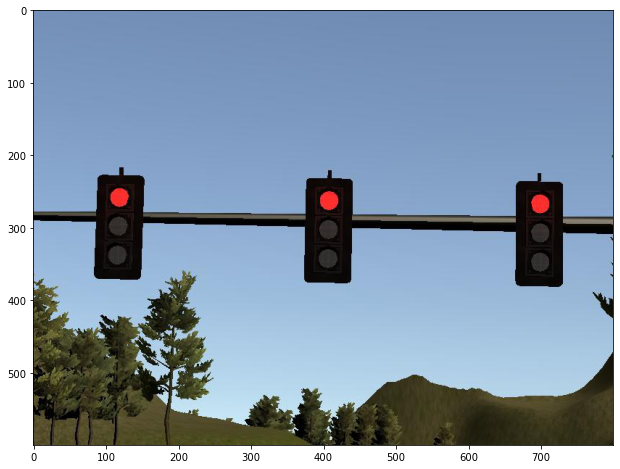

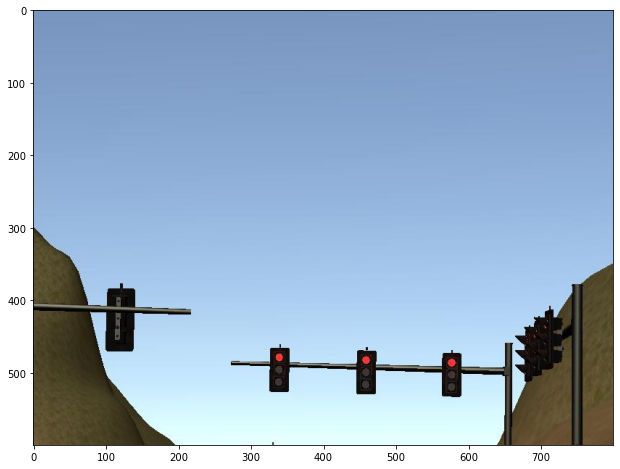

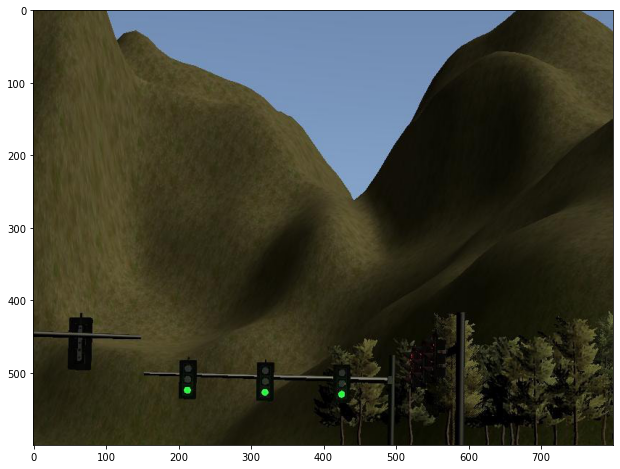

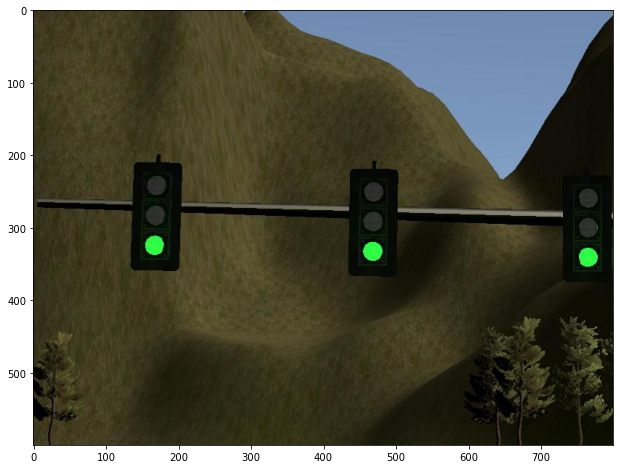

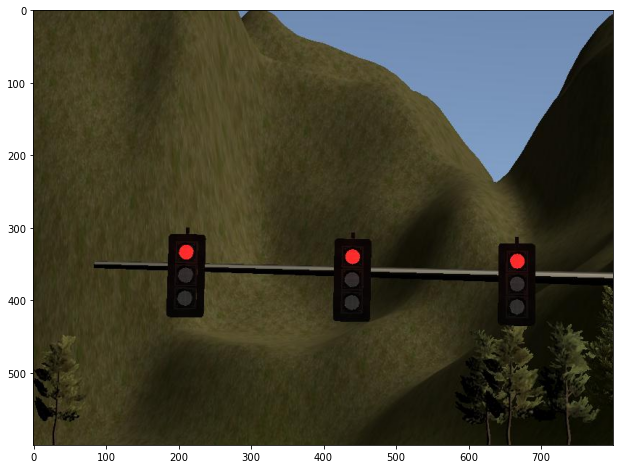

In [40]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
# This is required to display the images.
%matplotlib inline 

for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    # Puts image into numpy array to feed into tensorflow graph.
    # Note that by convention we put it into a numpy array with shape
    #   (height, width, channels), where channels=3 for RGB.
    image_np = np.array(Image.open(image_path))

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)

    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=20,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize = (12,8))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

In [ ]:
import shutil
shutil.make_archive('executable', 'zip', '/home/faizan_samad/testing')